# Diversity test

In [2]:
%pylab --n
%matplotlib inline

import seaborn as sns
import pandas as pd
sns.set_palette('colorblind')
import birdsonganalysis as bsa
from os.path import join, exists, basename
from scipy.io import wavfile
import pickle
import json
from pprint import pprint
import warnings
from IPython.display import Audio, display, Markdown

import sys

sys.path.append('../model/')

from song_fitter import SongModel, get_scores
from measures import genetic_neighbours
import synth
from synth import synthesize
from measures import bsa_measure

def comp(a, b):
    return np.linalg.norm(a - b)

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [14]:
path = '../model/res/diversity_weight/seed10+big_ba+50_conc+3_day_conc+125_diversity_weight//'
if exists(join(path, 'aborted.txt')):
    warnings.warn('Aborted run')
if not exists(join(path, 'data.pkl')):
    warnings.warn('Run is not finished')

/home/ecoffet/.virtualenvs/birdsongs/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Run is not finished
  """


In [15]:
sr, tutor = wavfile.read(join(path, 'tutor.wav'))
try:
    with open(join(path, 'conf.json'), 'r') as f:
        run_param = json.load(f)
except FileNotFoundError:
    with open(join(path, 'params.json'), 'r') as f:
        run_param = json.load(f)

In [16]:
out = '| key | value |\n|---|---|\n' + '\n'.join(['| {} | {} |'.format(key, run_param[key]) for key in sorted(run_param.keys())])
display(Markdown(out))

| key | value |
|---|---|
| coefs | {'entropy': 5, 'am': 1, 'fm': 1, 'amplitude': 5, 'goodness': 1, 'pitch': 1} |
| comp | linalg |
| concurrent | 3 |
| days | 50 |
| dev | [0.001, 0.001, 0.005, 1, 0.0005, 0.0005, 0.0005, 1, 5e-05, 5e-05, 0.005, 10, 0.005, 0.002, 0.002, 0.005, 1, 0.0005] |
| diversity_threshold | 500 |
| diversity_weight | 1.25 |
| dlm | optimise_gesture_whole |
| iter_per_train | 20 |
| maxs | [50, 4, 3.141592653589793, 40000, 50, 4, 3.141592653589793, 40000, 50, 5, 3.141592653589793, 40000, 10, 50, 3, 3.141592653589793, 1000, 2] |
| mins | [-50, 0, -3.141592653589793, 0, -50, 0, -3.141592653589793, 0, -50, 0, -3.141592653589793, 0, -5, -50, 0, -3.141592653589793, 0, -3] |
| name | seed10+big_ba+50_conc+3_day_conc+125_diversity_weight |
| night_concurrent | 50 |
| nlm | mutate_microbial_diversity_uniform |
| prior | [0, 0, 3.141592653589793, 15, 0, 0, 0.39269908169872414, 45, 0, 0, 0, 5000, 1, 0, 0, 0, 0, 0.15] |
| replay | 500 |
| replays | 500 |
| seed | 10 |
| train_per_day | 100 |
| tutor | ../data/boari_short.wav |

In [17]:
try:
    with open(join(path, 'data.pkl'), 'rb') as f:
        songlog = pickle.load(f)
except FileNotFoundError:
    warnings.warn('warning, learning not over')
    with open(join(path, 'data_cur.pkl'), 'rb') as f:
        songlog = pickle.load(f)

/home/ecoffet/.virtualenvs/birdsongs/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: warning, learning not over
  """


In [18]:
night_data = [item[1] for item in songlog if item[0] == 'night']
nd = pd.DataFrame(night_data)

In [19]:
nd

,cond,pop
0,before_evening,[<song_model.SongModel object at 0x7f2ba89ca04...
1,evening,[<song_model.SongModel object at 0x7f2ba8a517b...
2,before_morning,[<song_model.SongModel object at 0x7f2ba893419...
3,morning,[<song_model.SongModel object at 0x7f2ba891655...
4,before_evening,[<song_model.SongModel object at 0x7f2ba892a40...
5,evening,[<song_model.SongModel object at 0x7f2ba88b286...
6,before_morning,[<song_model.SongModel object at 0x7f2ba88a99b...
7,morning,[<song_model.SongModel object at 0x7f2ba880f51...
8,before_evening,[<song_model.SongModel object at 0x7f2ba8821cf...
9,evening,[<song_model.SongModel object at 0x7f2ba8826f2...


In [31]:
scores = []
scores_neigh = []
for i, row in nd.iterrows():
    print (i)
    if i == 20:
        break
    cur_score = get_scores(tutor, nd.iloc[i]['pop'], lambda x: bsa_measure(x, sr, coefs=run_param['coefs']), comp)
    scores.append(cur_score)
    scores_neigh.append(cur_score * genetic_neighbours(nd.iloc[i]['pop'], nd.iloc[i]['pop'], run_param['diversity_threshold']))
nd = pd.DataFrame(nd[:len(scores)])
nd['scores']= scores

0
1
2
3
4


In [32]:
nd = pd.DataFrame(nd[:len(scores)])
nd['scores']= scores
nd['neigh_scores'] = scores_neigh

In [33]:
songs_score = []
for i, row in nd.iterrows():
    for song, score, neigh in zip(nd.iloc[i]['pop'], nd.iloc[i]['scores'], nd.iloc[i]['neigh_scores']):
        songs_score.append({'i': i, 'score': score, 'cond': nd.iloc[i]['cond'], 'neigh_score': neigh})

scores_df = pd.DataFrame(songs_score)

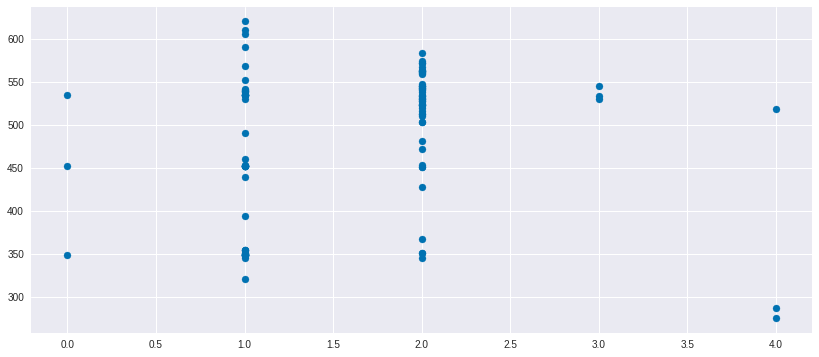

In [34]:
plt.figure(figsize=(14, 6))
plt.scatter(scores_df['i'], scores_df['score'])

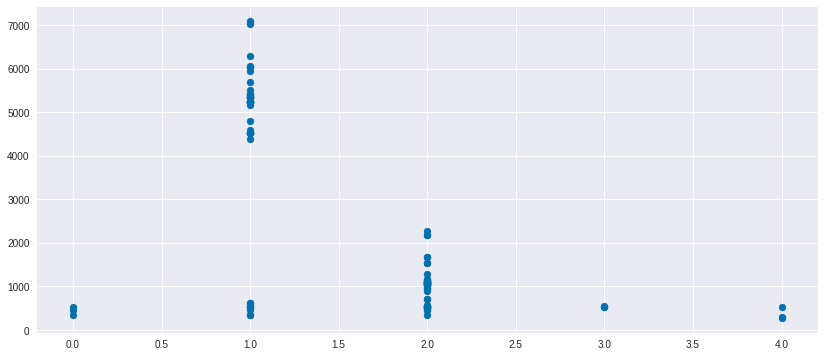

In [35]:
plt.figure(figsize=(14, 6))
plt.scatter(scores_df['i'], scores_df['neigh_score'])

In [25]:
songs = nd.iloc[2]['pop']

In [14]:
from bisect import bisect_left

100


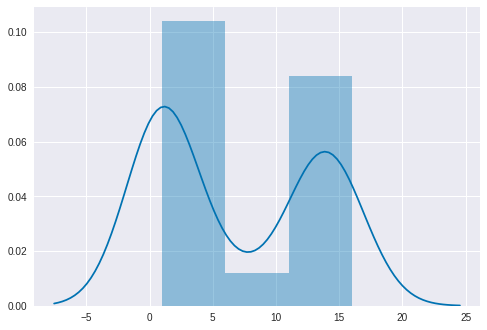

38.8544
500


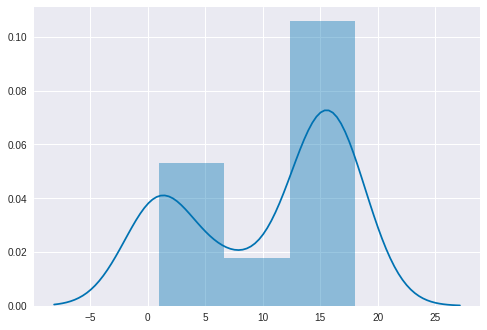

44.3376
5000


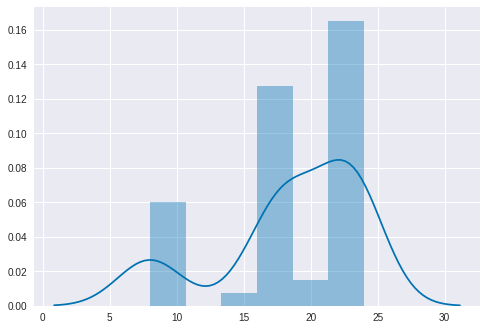

27.1636
10000


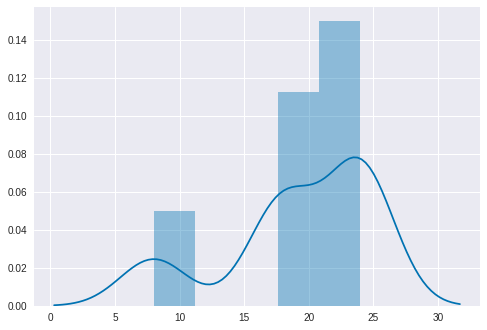

31.6416
50000


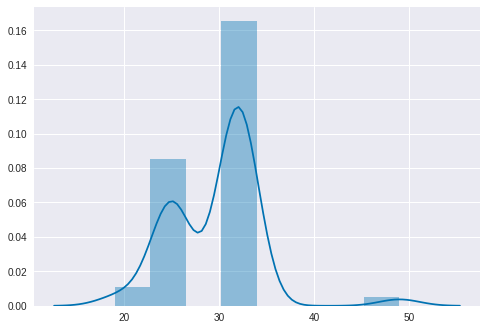

21.5956
100000


LinAlgError: singular matrix

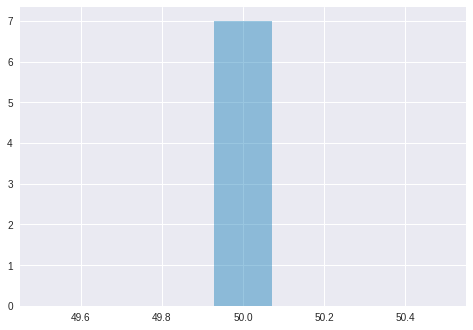

In [26]:
m = 1
for th in [100, 500, 5000, 10000, 50000, 100000]:
    print(th)
    neigh = genetic_neighbours(nd.iloc[m]['pop'], nd.iloc[m]['pop'], threshold=th)
    sns.distplot(neigh)
    plt.show()
    print(np.var(neigh))

In [16]:
nd.iloc[m]['pop'][66].gestures

IndexError: index 66 is out of bounds for axis 0 with size 50